# EDA

In [61]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm
from scipy.stats import pearsonr
from statsmodels.api import tsa

In [62]:
#reading csv with columns because of the index column
df = pd.read_csv("../data/FinalData.csv",usecols=['date', 'open', 'high', 'low', 'close', 'Volume BTC','Volume USD'])

In [63]:
#converting date column to date time
df['date'] = pd.to_datetime(df['date'])

In [64]:
#setting date as index for easier timer series analysis
df.set_index('date', inplace=True)

In [65]:
#sanity check
df.head()

,open,high,low,close,Volume BTC,Volume USD
date,,,,,,
2024-06-01 23:00:00,67727.03,67776.13,67678.00,67707.13,0.946410,64078.701518
2024-06-01 22:00:00,67702.67,67820.00,67666.62,67727.03,2.039246,138112.080438
2024-06-01 21:00:00,67747.62,67765.00,67663.23,67702.67,2.305510,156089.178650
2024-06-01 20:00:00,67708.99,67747.62,67637.30,67747.62,3.178401,215329.131610
2024-06-01 19:00:00,67689.17,67734.50,67630.86,67708.99,4.422047,299412.326623


In [70]:
#another sanity check just to make sure there are no days / missing values
first_day = df.index.min()
last_day = df.index.max()

full_range = pd.date_range(start=first_day, end=last_day, freq="D")

full_range.difference(df.index)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [67]:
#looking at description of the dataset
df.describe()

,open,high,low,close,Volume BTC,Volume USD
count,75823.000000,75823.000000,75823.000000,75823.000000,75823.000000,7.582300e+04
mean,18424.585797,18511.338272,18332.666545,18425.474899,110.322647,1.354244e+06
std,18426.995781,18513.486340,18334.842026,18427.746991,233.273802,2.803469e+06
min,243.600000,243.600000,236.000000,243.600000,0.000000,0.000000e+00
25%,3964.700000,3975.355000,3945.200000,3964.775000,13.688283,1.084489e+05
50%,9872.990000,9925.000000,9812.000000,9873.940000,41.435497,4.674784e+05
75%,29404.010000,29476.705000,29349.575000,29404.080000,111.064901,1.452794e+06
max,73612.770000,73797.680000,73260.340000,73612.770000,8526.751048,1.039629e+08


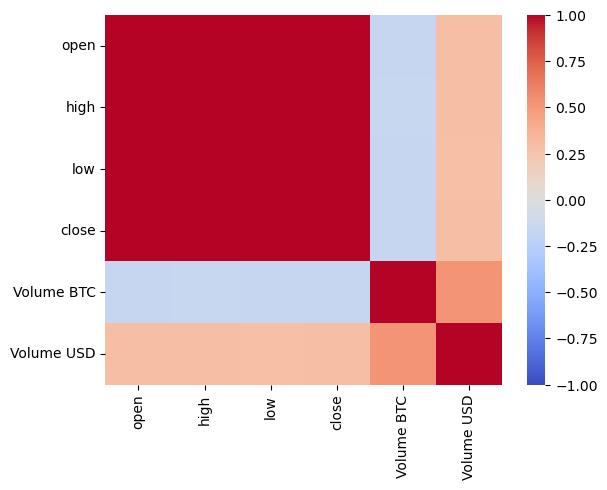

In [68]:
#making coorelation heatmap to get further insights and get more idea about feature engineering
plt.figure()
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", vmax=1.0, vmin=-1.0)
plt.show()

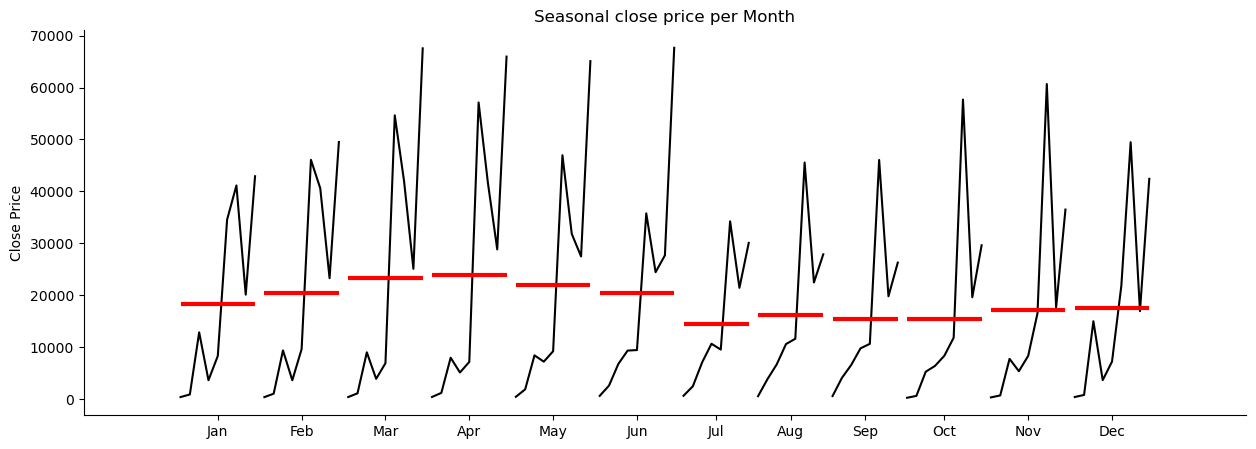

In [77]:
# creating Seasonal close price per Month
from statsmodels.graphics.tsaplots import month_plot

df_monthly = df.resample("M").mean()

plt.figure(figsize=(15, 5))

# Create the seasonal plot
month_plot(df_monthly["close"], ylabel="Close Price", ax=plt.gca())

plt.title("Seasonal close price per Month")
sns.despine()
plt.show()